
### Titanic Plotting
- Load data generated previously from 'titanic_filtered.csv'
- plot histogram of ages of people
- plot no of people in each pclass on bar chart


- plot a horizontal bar-chart depicting the ratio of males to females
- plot a bar-chart depicting the ratio of male-survived, female-survived, male-dead, female-dead. 
- plot a stacked bar chart of number of male-survived,dead and female-survived, dead.
- plot stacked bar of survived with different pclass in same bar.


- plot box plot of ages of survived vs not-survived
- plot scatter plot of ages vs survived.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("titanic_filtered.csv")
df

,pclass,survived,gender,age,sibsp,parch,ticket,fare,embarked
0,1,1,female,29.000000,0,0,24160,211.34,S
1,1,1,male,0.916700,1,2,113781,151.55,S
2,1,0,female,2.000000,1,2,113781,151.55,S
3,1,0,male,30.000000,1,2,113781,151.55,S
4,1,0,female,25.000000,1,2,113781,151.55,S
...,...,...,...,...,...,...,...,...,...
1302,3,0,female,14.500000,1,0,2665,14.45,C
1303,3,0,female,29.881135,1,0,2665,14.45,C
1304,3,0,male,26.500000,0,0,2656,7.23,C
1305,3,0,male,27.000000,0,0,2670,7.23,C


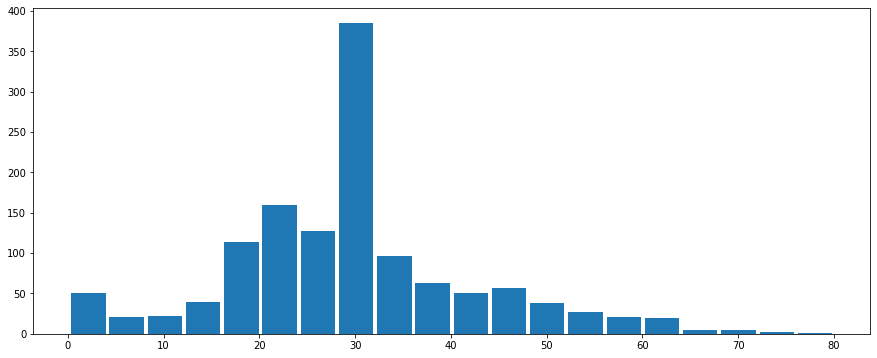

In [2]:
# plot histogram of ages of people
a = df.age
plt.figure(figsize=(15,6))
r = plt.hist(a, rwidth = .9, bins=20)
plt.show()


pclass
1    321
2    277
3    709
dtype: int64


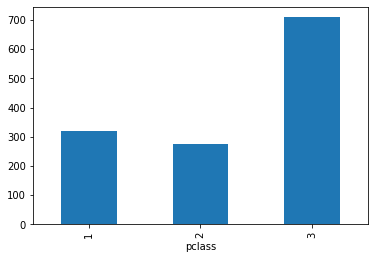

In [3]:
# plot no of people in each pclass on bar chart
a = df.groupby('pclass').size()
print(a)
a.plot.bar()

# df.pclass.value_counts().plot.bar()

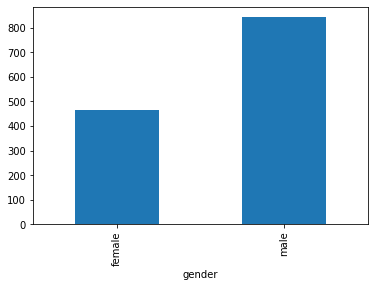

In [4]:
# plot a bar-chart depicting the ratio of males to females
df.groupby('gender').size().plot.bar()


survived  gender
0         female    127
          male      682
1         female    337
          male      161
dtype: int64
MultiIndex([(0, 'female'),
            (0,   'male'),
            (1, 'female'),
            (1,   'male')],
           names=['survived', 'gender'])
gender    female  male
survived              
0            127   682
1            337   161


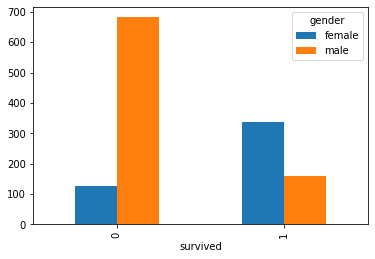

In [5]:
# plot a bar-chart depicting the ratio of male-survived, female-survived, male-dead, female-dead.

# df[['gender','survived']].groupby(['gender','survived']).size().plot.bar()

grp = df.groupby(['survived','gender'])
s = grp.size()
print(s)
print(s.index)
res = s.unstack()
print(res)

res.plot.bar()


gender  survived  pclass
female  0         1           5
                  2          12
                  3         110
        1         1         137
                  2          94
                  3         106
male    0         1         118
                  2         146
                  3         418
        1         1          61
                  2          25
                  3          75
dtype: int64

MultiIndex([('female', 0, 1),
            ('female', 0, 2),
            ('female', 0, 3),
            ('female', 1, 1),
            ('female', 1, 2),
            ('female', 1, 3),
            (  'male', 0, 1),
            (  'male', 0, 2),
            (  'male', 0, 3),
            (  'male', 1, 1),
            (  'male', 1, 2),
            (  'male', 1, 3)],
           names=['gender', 'survived', 'pclass'])

pclass             1    2    3
gender survived               
female 0           5   12  110
       1         137   94  106
male   0         118  146  418
       1

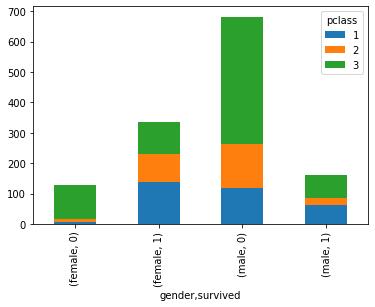

In [6]:
# plot a stacked bar chart of number of male-survived,dead and female-survived, dead.
# plot a stacked bar chart of number of male-survived,dead and female-survived, dead.
grp = df.groupby(by=["gender", "survived", "pclass"])
s = grp.size()
print()
print(s)

print()
print(s.index)

print()
res = s.unstack()
print(res)
res.plot(kind="bar", stacked=True)



survived  pclass
0         1         123
          2         158
          3         528
1         1         198
          2         119
          3         181
dtype: int64

MultiIndex([(0, 1),
            (0, 2),
            (0, 3),
            (1, 1),
            (1, 2),
            (1, 3)],
           names=['survived', 'pclass'])

pclass      1    2    3
survived               
0         123  158  528
1         198  119  181


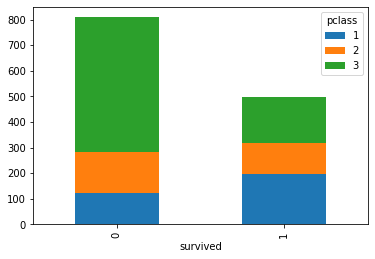

In [7]:
# plot stacked bar of survived with different pclass in same bar

grp = df.groupby(by=["survived", "pclass"])
s = grp.size()
print()
print(s)

print()
print(s.index)

print()
res = s.unstack()
print(res)
res.plot(kind="bar", stacked=True)


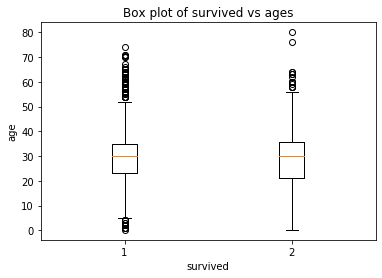

In [8]:
# plot box plot of ages of survived vs not-survived

a = df['age'][df['survived'] == 0]

b = df['age'][df['survived'] == 1]

plt.title('Box plot of survived vs ages')
plt.ylabel('age')
plt.xlabel('survived')


plt.boxplot([a,b])
plt.show()


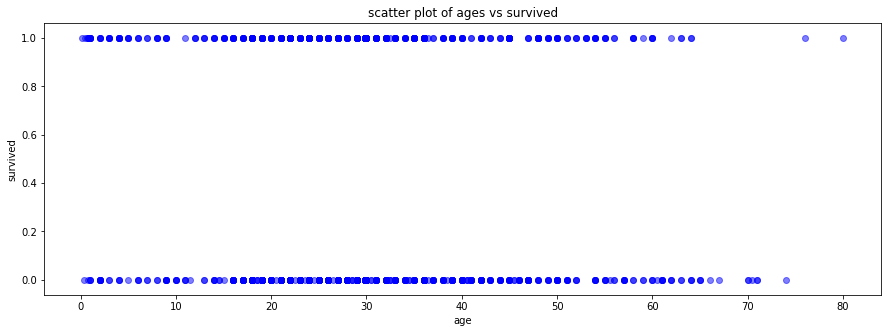

In [10]:
# plot scatter plot of ages vs survived. 
plt.figure(figsize=(15,5))
plt.title('scatter plot of ages vs survived')
a = plt.xlabel('age')
s = plt.ylabel('survived')
plt.scatter(df.age,df.survived  ,alpha=0.5, color='b')